In [12]:
# Install NLTK if not installed
!pip install nltk

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
from google.colab import files

uploaded = files.upload()  # This will open a file chooser




Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [23]:
import pandas as pd

# Upload the downloaded CSV to Colab or reference path
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Assign proper column names
df.columns = ['sentiment','id','date','query','user','text']

# Keep only relevant columns
df = df[['text','sentiment']]

# Map sentiment values to labels
df['sentiment'] = df['sentiment'].map({0:'negative', 2:'neutral', 4:'positive'})

df.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative


In [24]:
#Step 3: Preprocess Tweets

#We clean the text so that it’s ready for ML. This includes removing links, mentions, hashtags, punctuation, numbers, converting to lowercase, and removing stopwords.

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)   # remove links
    text = re.sub(r'\@\w+|\#','', text)                  # remove mentions & hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)             # remove punctuation & numbers
    text = text.lower()                                  # lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


#✅ Now you have a clean_text column ready for vectorization.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,negative,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,negative,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,negative,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,behaving im mad cant see


In [25]:
#Step 4: Split Data & Vectorize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_text']
y = df['sentiment']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numeric features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


#✅ Now your tweets are converted into numerical vectors suitable for ML models.

In [26]:
#Step 5: Train Models
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Naive Bayes Accuracy: 0.75795

Confusion Matrix:
 [[122218  37276]
 [ 40180 120326]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.77      0.76    159494
    positive       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Logistic Regression Accuracy: 0.77359375

Confusion Matrix:
 [[119879  39615]
 [ 32835 127671]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.75      0.77    159494
    positive       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



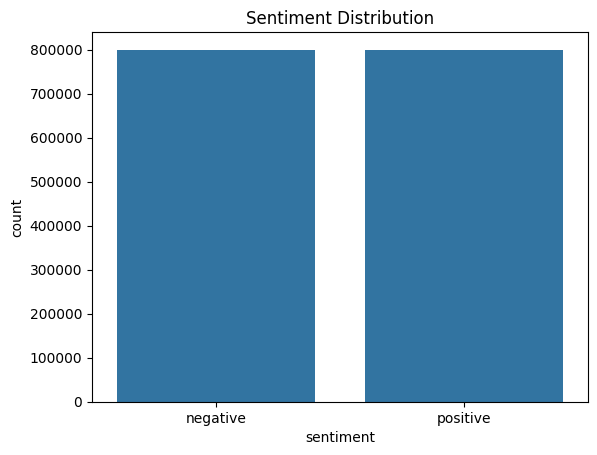

In [27]:
#Step 6: Visualize Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [30]:
#Step 7: Save Processed Dataset (Optional)
df.to_csv("tweets_processed.csv", index=False)
print("Processed dataset saved!")

Processed dataset saved!
